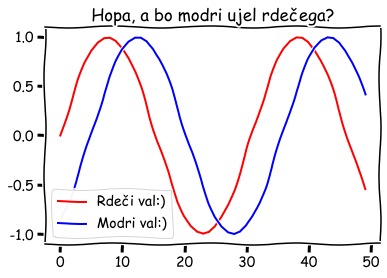

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.xkcd()  # Tukaj se spremenijo stili...
plt.plot(np.sin(np.linspace(0, 10)), 'r', label='Rdeči val:)')
plt.plot(np.sin(np.linspace(0, 10)-1), 'b', label='Modri val:)')
plt.title('Hopa, a bo modri ujel rdečega?')
plt.legend()
plt.show()

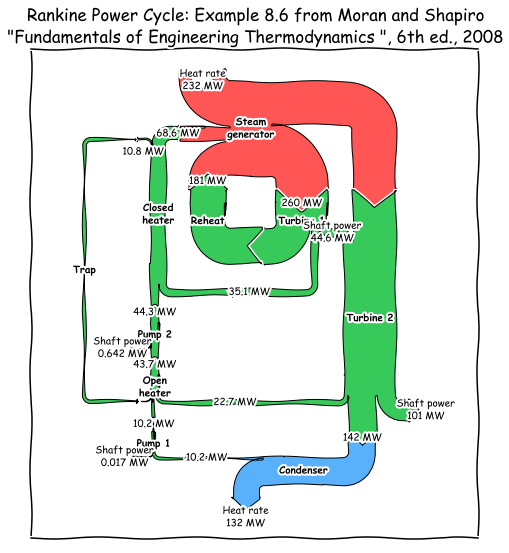

In [8]:
# %load https://matplotlib.org/stable/_downloads/2e9a7fa3acabe04307104bb0222f2f30/sankey_rankine.py
"""
===================
Rankine power cycle
===================

Demonstrate the Sankey class with a practical example of a Rankine power cycle.
"""

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Rankine Power Cycle: Example 8.6 from Moran and "
                     "Shapiro\n\x22Fundamentals of Engineering Thermodynamics "
                     "\x22, 6th ed., 2008")
Hdot = [260.431, 35.078, 180.794, 221.115, 22.700,
        142.361, 10.193, 10.210, 43.670, 44.312,
        68.631, 10.758, 10.758, 0.017, 0.642,
        232.121, 44.559, 100.613, 132.168]  # MW
sankey = Sankey(ax=ax, format='%.3G', unit=' MW', gap=0.5, scale=1.0/Hdot[0])
sankey.add(patchlabel='\n\nPump 1', rotation=90, facecolor='#37c959',
           flows=[Hdot[13], Hdot[6], -Hdot[7]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.883, 0.25],
           orientations=[1, -1, 0])
sankey.add(patchlabel='\n\nOpen\nheater', facecolor='#37c959',
           flows=[Hdot[11], Hdot[7], Hdot[4], -Hdot[8]],
           labels=[None, '', None, None],
           pathlengths=[0.25, 0.25, 1.93, 0.25],
           orientations=[1, 0, -1, 0], prior=0, connect=(2, 1))
sankey.add(patchlabel='\n\nPump 2', facecolor='#37c959',
           flows=[Hdot[14], Hdot[8], -Hdot[9]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.25, 0.25],
           orientations=[1, 0, 0], prior=1, connect=(3, 1))
sankey.add(patchlabel='Closed\nheater', trunklength=2.914, fc='#37c959',
           flows=[Hdot[9], Hdot[1], -Hdot[11], -Hdot[10]],
           pathlengths=[0.25, 1.543, 0.25, 0.25],
           labels=['', '', None, None],
           orientations=[0, -1, 1, -1], prior=2, connect=(2, 0))
sankey.add(patchlabel='Trap', facecolor='#37c959', trunklength=5.102,
           flows=[Hdot[11], -Hdot[12]],
           labels=['\n', None],
           pathlengths=[1.0, 1.01],
           orientations=[1, 1], prior=3, connect=(2, 0))
sankey.add(patchlabel='Steam\ngenerator', facecolor='#ff5555',
           flows=[Hdot[15], Hdot[10], Hdot[2], -Hdot[3], -Hdot[0]],
           labels=['Heat rate', '', '', None, None],
           pathlengths=0.25,
           orientations=[1, 0, -1, -1, -1], prior=3, connect=(3, 1))
sankey.add(patchlabel='\n\n\nTurbine 1', facecolor='#37c959',
           flows=[Hdot[0], -Hdot[16], -Hdot[1], -Hdot[2]],
           labels=['', None, None, None],
           pathlengths=[0.25, 0.153, 1.543, 0.25],
           orientations=[0, 1, -1, -1], prior=5, connect=(4, 0))
sankey.add(patchlabel='\n\n\nReheat', facecolor='#37c959',
           flows=[Hdot[2], -Hdot[2]],
           labels=[None, None],
           pathlengths=[0.725, 0.25],
           orientations=[-1, 0], prior=6, connect=(3, 0))
sankey.add(patchlabel='Turbine 2', trunklength=3.212, facecolor='#37c959',
           flows=[Hdot[3], Hdot[16], -Hdot[5], -Hdot[4], -Hdot[17]],
           labels=[None, 'Shaft power', None, '', 'Shaft power'],
           pathlengths=[0.751, 0.15, 0.25, 1.93, 0.25],
           orientations=[0, -1, 0, -1, 1], prior=6, connect=(1, 1))
sankey.add(patchlabel='Condenser', facecolor='#58b1fa', trunklength=1.764,
           flows=[Hdot[5], -Hdot[18], -Hdot[6]],
           labels=['', 'Heat rate', None],
           pathlengths=[0.45, 0.25, 0.883],
           orientations=[-1, 1, 0], prior=8, connect=(2, 0))
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
# Notice that the explicit connections are handled automatically, but the
# implicit ones currently are not.  The lengths of the paths and the trunks
# must be adjusted manually, and that is a bit tricky.

plt.show()


#############################################################################
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.sankey`
#    - `matplotlib.sankey.Sankey`
#    - `matplotlib.sankey.Sankey.add`
#    - `matplotlib.sankey.Sankey.finish`
